In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import os
path = os.listdir(r'D:\Sem-5\Mini project\Dataset\Train')
classes  = {'Normal':0, 'Keratoconus':1}

In [4]:
import cv2
X = []
Y = []
for cls in classes:
    pth = r'D:\Sem-5\Mini project\Dataset\Train/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])


In [5]:
np.unique(Y)

array([0, 1])

In [6]:
X = np.array(X)
Y = np.array(Y)

In [7]:
pd.Series(Y).value_counts()

0    1050
1    1050
Name: count, dtype: int64

In [8]:
X.shape

(2100, 200, 200)

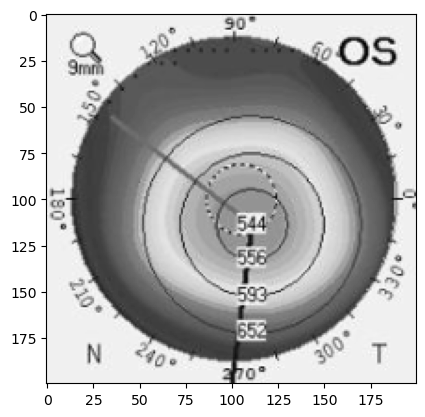

In [9]:
plt.imshow(X[0],cmap='gray')

In [10]:
X_updated = X.reshape(len(X), -1)
X_updated.shape


(2100, 40000)

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [12]:
xtrain.shape, xtest.shape

((1680, 40000), (420, 40000))

In [13]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [14]:
from sklearn.decomposition import PCA

In [15]:
print(xtrain.shape, xtest.shape)
pca = PCA(.98)
pca_train = xtrain
pca_test = xtest

(1680, 40000) (420, 40000)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [17]:
import warnings
warnings.filterwarnings('ignore')
lg = LogisticRegression(C = 0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [18]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [19]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score: 0.9976190476190476
Testing Score: 0.9333333333333333


In [20]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score: 0.9547619047619048
Testing Score: 0.9404761904761905


In [21]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([  4,  21,  34,  49,  64,  78, 110, 124, 142, 159, 161, 167, 168,
        233, 236, 256, 260, 288, 299, 308, 313, 323, 340, 346, 384],
       dtype=int64),)

In [22]:
pred[4]

0

In [23]:
ytest[4]

1

In [24]:
dec = {0:'Normal', 1:'Keratoconus'}

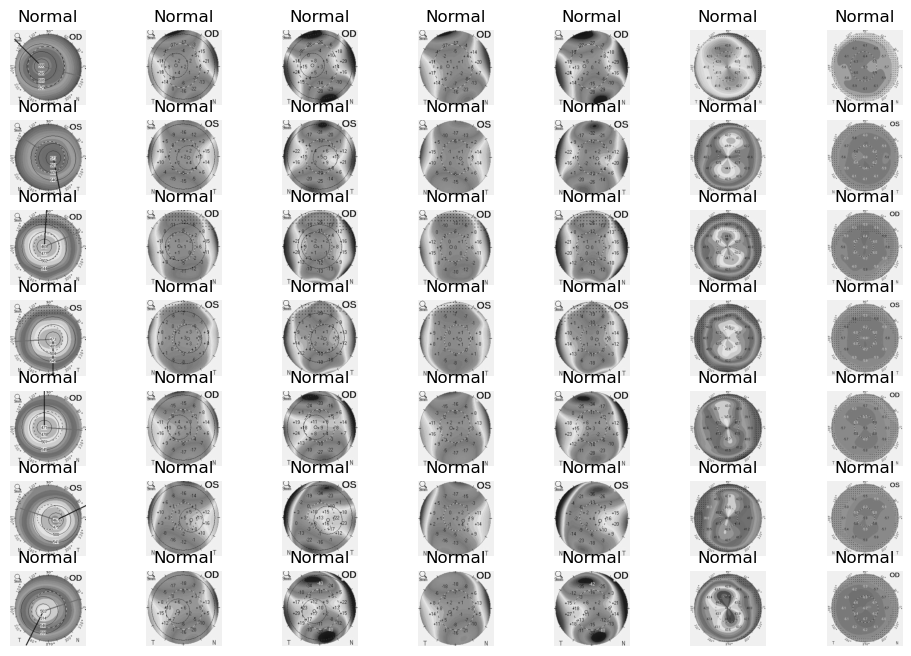

In [25]:
plt.figure(figsize=(12,8))
p = os.listdir(r'D:\Sem-5\Mini project\Dataset\Test')
c=1
for i in os.listdir(r'D:\Sem-5\Mini project\Dataset\Test\Normal')[:49]:
    plt.subplot(7,7,c)
   
    img = cv2.imread(r'D:\Sem-5\Mini project\Dataset\Test\Normal/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1


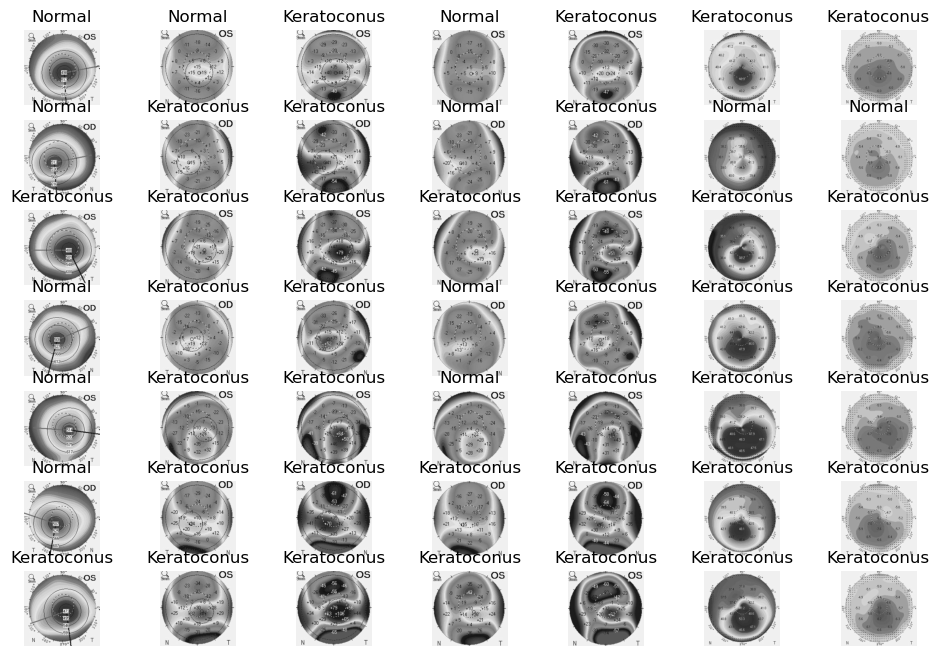

In [26]:
plt.figure(figsize=(12,8))
p = os.listdir(r'D:\Sem-5\Mini project\Dataset\Test')
c=1
for i in os.listdir(r'D:\Sem-5\Mini project\Dataset\Test\Keratoconus')[:49]:
    plt.subplot(7,7,c)
   
    img = cv2.imread(r'D:\Sem-5\Mini project\Dataset\Test\Keratoconus/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1


In [29]:
accuracy = accuracy_score(ytest, pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9404761904761905
